<a href="https://colab.research.google.com/github/MorozovDesu/neural_network_technologies/blob/main/%22%D0%9D%D0%B5%D0%B9%D1%80%D0%BE%D1%81%D0%B5%D1%82%D0%B5%D0%B2%D1%8B%D0%B5_%D1%82%D0%B5%D1%85%D0%BD%D0%BE%D0%BB%D0%BE%D0%B3%D0%B8%D0%B8_1_%D0%9B%D0%B0%D0%B1%D0%B0_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание
---
ВАРИАНТ РАБОТЫ имеет вид: ZPN, где

Z=1-6 – вид закона распределения генерируемых признаков

1.     Биномиальное

2.     Геометрическое

3.     Гипергеометрическое

4.     Пуассона

5.     Равномерное

6.     Нормальное

P=2,3 – число признаков

N=3,4,5 – число классов

ПОРЯДОК ВЫПОЛНЕНИЯ РАБОТЫ

1.     Сгенерировать случайные числа по указанному закону распределения. Из них создается матрица из M строк (наблюдений) и P столбцов (признаков). Сгенерированные строки должны принадлежать одному из N классов за счет прибавления к сгенерированным числам положительной или отрицательной добавки (функция)
2.     Все признаки   должны быть числовыми и нормализованными (находиться в диапазоне [0,1]). Дополнительно создается классификационный признак.

3.     Разделить данные варианта на  обучающую и тестирующую выборки.

4.     Персептрон. Так как персептрон способен делить объекты только на два класса, то организуем работу итерационно:

        4.1.  Создать персептрон для отделения 1 класса от всех остальных. Протестировать персептрон по обучающей и тестирующей выборкам и определить процент правильно классифицированных объектов 1 класса.

        4.2.  Создать персептрон для отделения 2 класса от оставшихся. Протестировать персептрон по обучающей и тестирующей выборкам и определить процент правильно классифицированных объектов 2 класса

        4.3.  Продолжить, пока не будут разделены все объекты

        4.4.  Построить графики разделяющей поверхности и визуальное представление результатов тестирования

5.     Сеть Кохонена (Kohonen). Вероятностная нейронная сеть (PNN).  Сеть с прямым распрост­ра­нением сигнала и обрат­ным распространением ошибки (MLP). Осуществить кластеризацию с помощью конкурирующей сети (слой Кохонена), а затем классификацию с помощью двух трехслойных сетей: вероятностной нейронной сети (PNN) и сети с прямым распрост­ра­нением сигнала и обрат­ным распространением ошибки (MLP). Для каждого вида сети выполнить следующие этапы:

     5.1 Создание сети

     5.2 Обучение сети на обучающей выборке

     5.3 Протестировать сеть отдельно по обучающей и по тестирующей выборке

     5.4 Построить визуальное представление результатов тестирования

     5.5 Оценить качество классификации в виде матриц

     5.6 Выдать число итераций обучения

6.     Оформить результаты в виде таблицы


#Подготовка данных

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import math

from random import seed
from random import random
from math import exp

from sklearn.datasets import make_blobs

In [ ]:
# Указываем параметры
# Z = 1  Выбираем гипергеометричское распределение
P = 2  # Число признаков
N = 5  # Число классов

count = 0
M = 200  # Число наблюдений
data = []
cluster_spacing = 25  # Расстояние между кластерами
ngood = np.random.randint(70, 100)
nbad = 100 - ngood
nsample = np.random.randint(1, 100)
for i in range(5):
    c = np.random.hypergeometric(ngood=ngood, nbad=nbad, nsample=nsample, size=(M, P)) + count
    count += cluster_spacing  # Увеличиваем расстояние между кластерами
    data.append(c)

# Собираем признаки из всех классов
x = np.concatenate([c[:, 0] for c in data])  # Признаки по оси X
y = np.concatenate([c[:, 1] for c in data])  # Признаки по оси Y
xy = [[x[i], y[i]] for i in range(len(x))]

# Создаем список Y, присваивая каждому классу уникальное значение
Y = []
for i in range(5):
    Y.extend([i] * M)
# Преобразуем список Y в массив numpy
Y = np.array(Y)

# Создаем DataFrame
res_df = pd.DataFrame(xy)
# Создаем двумерный рассеянный график
# plt.scatter(x, y, c=Y)
# # Показываем график
# plt.show()
# print(Y)
# Создаем DataFrame с добавленными значениями кластера
df = pd.DataFrame({'X': x, 'Y': y, 'Cluster': Y})

# Создаем график без аннотаций
fig = px.scatter(df, x='X', y='Y', color='Cluster', labels={'X': 'Feature 0', 'Y': 'Feature 1', 'Cluster': 'Cluster'})
fig.update_traces(marker=dict(size=6))

# Отображаем график
fig.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0, 1))
scaler.fit(res_df)
standart_df = scaler.transform(res_df)
print(type(standart_df))
print(standart_df)

<class 'numpy.ndarray'>
[[0.00952381 0.01904762]
 [0.00952381 0.01904762]
 [0.01904762 0.00952381]
 ...
 [0.95238095 0.98095238]
 [0.96190476 0.96190476]
 [0.97142857 0.97142857]]


In [ ]:
# Импортируем класс KMeans из библиотеки scikit-learn для кластеризации данных.
from sklearn.cluster import KMeans
# Создаем объект KMeans с параметрами:
# - n_clusters=5 указывает, что мы хотим разделить данные на 5 кластера.
# - random_state=0 используется для установки начального состояния генератора случайных чисел и обеспечения воспроизводимости результатов.
kmeans = KMeans(n_clusters=5,n_init=10, random_state=0)
# Обучаем модель K-Means на стандартизированных данных `standart_df`.
kmeans.fit(standart_df)

KMeans(n_clusters=5, n_init=10, random_state=0)

In [ ]:
# Создаем DataFrame `df_cluster_centers` для хранения координат центров кластеров.
df_cluster_centers = pd.DataFrame(kmeans.cluster_centers_)

# Выводим DataFrame `df_cluster_centers`, который содержит координаты центров кластеров.
print(df_cluster_centers)
print("----------------------------------------------------------------------------------")
print("матрица ошибок")
# Выводим матрицу ошибок, которая показывает, как точки данных распределены по кластерам
# и сравнивает это с истинными метками классов.
# `Y` содержит истинные метки классов, а `kmeans.labels_` содержит предсказанные метки кластеров.
confusion_mat = confusion_matrix(Y, kmeans.labels_)
print(confusion_mat)

          0         1
0  0.728857  0.728762
1  0.252190  0.252286
2  0.489714  0.491286
3  0.015476  0.014762
4  0.968048  0.966524
----------------------------------------------------------------------------------
матрица ошибок
[[  0   0   0 200   0]
 [  0 200   0   0   0]
 [  0   0 200   0   0]
 [200   0   0   0   0]
 [  0   0   0   0 200]]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(standart_df, kmeans.labels_, test_size=0.3, random_state=42)

# X_train - обучающие признаки
# X_test - тестовые признаки
# y_train - метки обучающих данных
# y_test - метки тестовых данных

In [ ]:
print("Форма X_train:", X_train.shape)
print("Форма X_test:", X_test.shape)
assert len(X_train) + len(X_test) == len(standart_df), "Выборки пересекаются или неправильно разделены."
print("----------------------------------------------------------------------------------")
print("Форма y_train:", y_train.shape)
print("Форма y_test:", y_test.shape)
assert len(y_train) + len(y_test) == len(standart_df), "Выборки пересекаются или неправильно разделены."
print("----------------------------------------------------------------------------------")
# Вывести первые несколько объектов данных (первые 5, например)
print("Первые 5 объектов X_train:")
print(X_train[:5])
print("Первые 5 объектов y_train:")
print(y_train[:10])
print("Первые 5 объектов X_test:")
print(X_test[:5])
print("Первые 5 объектов y_test:")
print(y_test[:5])

Форма X_train: (700, 2)
Форма X_test: (300, 2)
----------------------------------------------------------------------------------
Форма y_train: (700,)
Форма y_test: (300,)
----------------------------------------------------------------------------------
Первые 5 объектов X_train:
[[0.47619048 0.5047619 ]
 [0.5047619  0.48571429]
 [0.5047619  0.4952381 ]
 [0.4952381  0.5047619 ]
 [0.73333333 0.73333333]]
Первые 5 объектов y_train:
[2 2 2 2 0 4 1 2 4 2]
Первые 5 объектов X_test:
[[0.4952381  0.48571429]
 [0.73333333 0.72380952]
 [0.71428571 0.73333333]
 [0.71428571 0.72380952]
 [0.47619048 0.5047619 ]]
Первые 5 объектов y_test:
[2 0 0 0 2]


# Персептрон

In [ ]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features) #
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias # тут ошибка
                y_predicted = self.activation_func(linear_output)
                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted
    #функция активации
    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

In [ ]:
# Создайте экземпляр класса Perceptron
perceptron = Perceptron(learning_rate=0.05, n_iters=1000)

# Обучите персептрон на обучающих данных
perceptron.fit(X_train, y_train)

# Выполните предсказания на трансформированных данных X_test
predictions = perceptron.predict(X_test)

# Определите процент правильно классифицированных объектов
correct_classifications = np.sum(predictions == y_test)
total_objects = len(y_test)
accuracy = correct_classifications / total_objects * 100

print(f"Процент правильно классифицированных объектов: {accuracy}%")

Процент правильно классифицированных объектов: 23.666666666666668%


#Отделяем класс от обучающей выбоки

In [ ]:
#отделяем первый класс от других в обучающей выборке
y_train1 = [[] for _ in range(len(y_train))]#создаем массив для отделения из Y_train 1 класса
for _ in range(len(y_train)):
    if y_train[_] == 3:
        y_train1[_] = 1
    else:
        y_train1[_] = 0
Y_train1 = np.array(y_train1)
Y_train1 = Y_train1.reshape((len(y_train), 1))

#отделяем первый класс от других  в тестирующей выборке
Y_test1 = [[] for _ in range(len(y_test))]#создаем массив для отделения из Y_train 1 класса
for _ in range(len(y_test)):
    if y_test[_] == 3:
        Y_test1[_] = 1
    else:
        Y_test1[_] = 0
y_test1 = np.array(Y_test1)
y_test1 = y_test1.reshape((len(y_test), 1))

dfff = pd.DataFrame(X_train)

# Создаем DataFrame с обучающими данными
dfff = pd.DataFrame({'Feature 0': X_train[:, 0], 'Feature 1': X_train[:, 1], 'Cluster': Y_train1.flatten()})

# Создаем график с кластерами и метками
fig = go.Figure(data=[
    go.Scatter(
        x=dfff['Feature 0'],
        y=dfff['Feature 1'],
        mode='markers',
        marker=dict(size=6, color=Y_train1.flatten()),  # Цвет по кластерам
        text=Y_train1.flatten()  # Метки для отображения при наведении
    )
])

fig.update_layout(xaxis_title='Feature 0', yaxis_title='Feature 1')
fig.show()

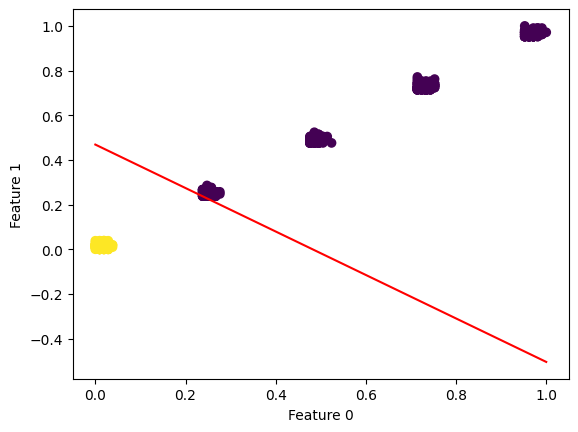

[[555   0]
 [  0 145]]


In [ ]:
per = Perceptron(n_iters=1000)
per.fit(X_train, y_train1)
perTrain1 = per.predict(X_train)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])
x1_1 = np.amin(X_train[:, 1])
x1_2 = np.amax(X_train[:, 1])

x = [x0_1, x0_2]
y = [x1_1, x1_2]

# Пересчет коэффициентов разделяющей прямой для двух признаков
slope = -per.weights[0] / per.weights[1]
intercept = -per.bias / per.weights[1]
# Вычисление точек для разделяющей прямой
x_line = np.array([x0_1, x0_2])
y_line = slope * x_line + intercept
# Построение двумерного рассеянного графика
plt.scatter(X_train[:, 0], X_train[:, 1], c=perTrain1, cmap='viridis')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

# Построение разделяющей прямой
plt.plot(x_line, y_line, color='red')
plt.show()
# Матрица различий
distinctions = confusion_matrix(y_train1, perTrain1)
print(distinctions)


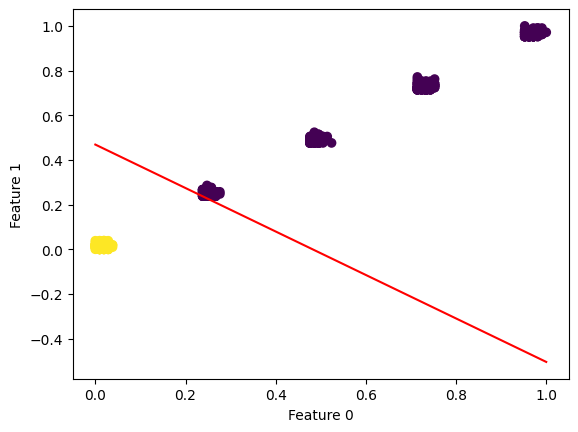

[[245   0]
 [  0  55]]


In [ ]:
perTest = per.predict(X_test)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])
x1_1 = np.amin(X_train[:, 1])
x1_2 = np.amax(X_train[:, 1])

x = [x0_1, x0_2]
y = [x1_1, x1_2]

# Пересчет коэффициентов разделяющей прямой для двух признаков
slope = -per.weights[0] / per.weights[1]
intercept = -per.bias / per.weights[1]
# Вычисление точек для разделяющей прямой
x_line = np.array([x0_1, x0_2])
y_line = slope * x_line + intercept
# Построение двумерного рассеянного графика
plt.scatter(X_train[:, 0], X_train[:, 1], c=perTrain1, cmap='viridis')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

# Построение разделяющей прямой
plt.plot(x_line, y_line, color='red')
plt.show()
# Матрица различий
distinctions = confusion_matrix(y_test1, perTest)
print(distinctions)

#Убираем 1й класс из обучающей выборки

In [ ]:
# Убираем класс 1 из обучающей выборки
class_to_remove = 1
indices_to_remove_train = np.where(y_train == class_to_remove)[0]
y_train2 = np.delete(y_train, indices_to_remove_train, axis=0)
X_train2 = np.delete(X_train, indices_to_remove_train, axis=0)

# Печатаем количество элементов после удаления
print(len(y_train2))
print(len(X_train2))

# Преобразуем класс 2 в класс 1 (если необходимо)
for i in range(len(y_train2)):
    if y_train2[i] == 4:
        y_train2[i] = 1
    else:
        y_train2[i] = 0

# Убираем класс 1 из тестовой выборки (аналогично)
indices_to_remove_test = np.where(y_test == class_to_remove)[0]
y_test2 = np.delete(y_test, indices_to_remove_test, axis=0)
X_test2 = np.delete(X_test, indices_to_remove_test, axis=0)

# Преобразуем класс 2 в класс 1 (если необходимо)
for i in range(len(y_test2)):
    if y_test2[i] == 4:
        y_test2[i] = 1
    else:
        y_test2[i] = 0

571
571


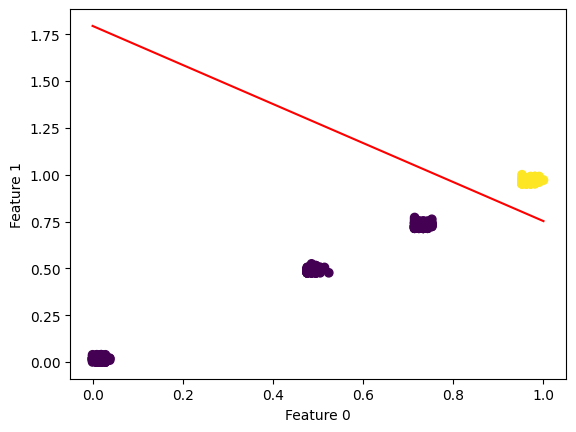

[[435   0]
 [  0 136]]


In [ ]:
per2 = Perceptron(n_iters=1000)

per2.fit(X_train2, y_train2)
perTrain2 = per2.predict(X_train2)

x0_1 = np.amin(X_train2[:, 0])
x0_2 = np.amax(X_train2[:, 0])
x1_1 = np.amin(X_train2[:, 1])
x1_2 = np.amax(X_train2[:, 1])

x = [x0_1, x0_2]
y = [x1_1, x1_2]

# Пересчет коэффициентов разделяющей прямой для двух признаков
slope = -per2.weights[0] / per2.weights[1]
intercept = -per2.bias / per2.weights[1]
# Вычисление точек для разделяющей прямой
x_line = np.array([x0_1, x0_2])
y_line = slope * x_line + intercept

# Построение двумерного рассеянного графика
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=perTrain2, cmap='viridis')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
# Построение разделяющей прямой
plt.plot(x_line, y_line, color='red')
plt.show()
# Матрица различий
distinctions = confusion_matrix(y_train2, perTrain2)
print(distinctions)


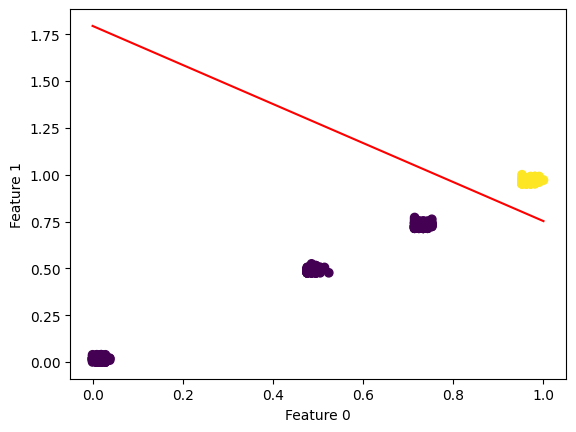

[[165   0]
 [  0  64]]


In [ ]:
perTest2 = per2.predict(X_test2)

x0_1 = np.amin(X_train2[:, 0])
x0_2 = np.amax(X_train2[:, 0])
x1_1 = np.amin(X_train2[:, 1])
x1_2 = np.amax(X_train2[:, 1])

x = [x0_1, x0_2]
y = [x1_1, x1_2]

# Пересчет коэффициентов разделяющей прямой для двух признаков
slope = -per2.weights[0] / per2.weights[1]
intercept = -per2.bias / per2.weights[1]
# Вычисление точек для разделяющей прямой
x_line = np.array([x0_1, x0_2])
y_line = slope * x_line + intercept

# Построение двумерного рассеянного графика
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=perTrain2, cmap='viridis')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
# Построение разделяющей прямой
plt.plot(x_line, y_line, color='red')
plt.show()
# Матрица различий
distinctions = confusion_matrix(y_test2, perTest2)
print(distinctions)

#Убираем 2й класс из обучающей выборки

In [ ]:
# Убираем 2 класс из обучающей выборки
indices_to_remove = np.where((y_train == 0) | (y_train == 1))
X_train3 = np.delete(X_train, indices_to_remove, axis=0)
y_train3 = np.delete(y_train, indices_to_remove, axis=0)
print(len(y_train3))
print(len(X_train3))

# Преобразуем класс 2 в класс 1 (если необходимо)
for i in range(len(y_train3)):
    if y_train3[i] == 3:
        y_train3[i] = 1
    else:
        y_train3[i] = 0

# Убираем 2 класс из тестовой выборки (аналогично)
indices_to_remove = np.where((y_test == 0) | (y_test == 1))
X_test3 = np.delete(X_test, indices_to_remove, axis=0)
y_test3 = np.delete(y_test, indices_to_remove, axis=0)

# Преобразуем класс 2 в класс 1 (если необходимо)
for i in range(len(y_test3)):
    if y_test3[i] == 3:
        y_test3[i] = 1
    else:
        y_test3[i] = 0


424
424


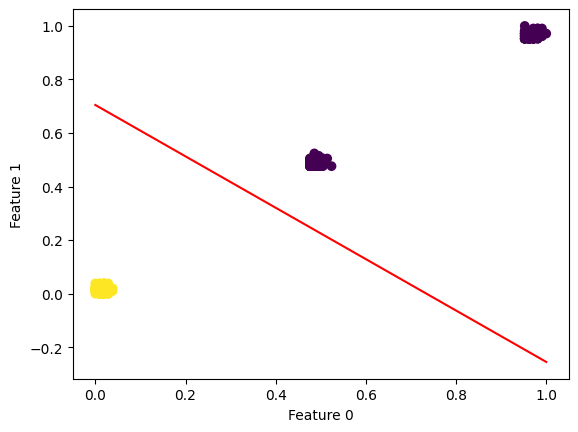

[[279   0]
 [  0 145]]


In [ ]:
per3 = Perceptron(n_iters=1000)

per3.fit(X_train3, y_train3)
perTrain3 = per3.predict(X_train3)

x0_1 = np.amin(X_train3[:, 0])
x0_2 = np.amax(X_train3[:, 0])
x1_1 = np.amin(X_train3[:, 1])
x1_2 = np.amax(X_train3[:, 1])

x = [x0_1, x0_2]
y = [x1_1, x1_2]

# Пересчет коэффициентов разделяющей прямой для двух признаков
slope = -per3.weights[0] / per3.weights[1]
intercept = -per3.bias / per3.weights[1]
# Вычисление точек для разделяющей прямой
x_line = np.array([x0_1, x0_2])
y_line = slope * x_line + intercept
# Построение двумерного рассеянного графика
plt.scatter(X_train3[:, 0], X_train3[:, 1], c=perTrain3, cmap='viridis')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

# Построение разделяющей прямой
plt.plot(x_line, y_line, color='red')
plt.show()
# Матрица различий
distinctions = confusion_matrix(y_train3, perTrain3)
print(distinctions)

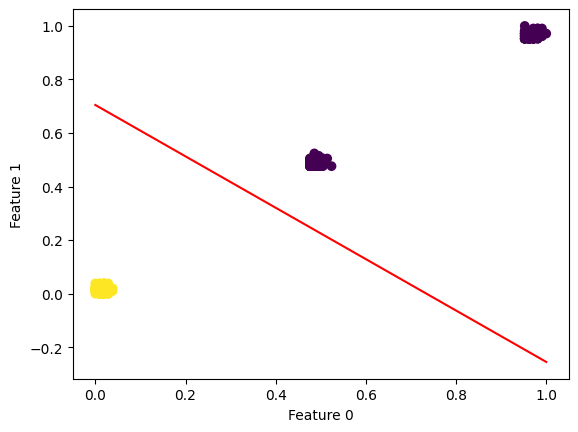

[[121   0]
 [  0  55]]


In [ ]:
perTest3 = per3.predict(X_test3)

x0_1 = np.amin(X_train3[:, 0])
x0_2 = np.amax(X_train3[:, 0])
x1_1 = np.amin(X_train3[:, 1])
x1_2 = np.amax(X_train3[:, 1])

x = [x0_1, x0_2]
y = [x1_1, x1_2]

# Пересчет коэффициентов разделяющей прямой для двух признаков
slope = -per3.weights[0] / per3.weights[1]
intercept = -per3.bias / per3.weights[1]
# Вычисление точек для разделяющей прямой
x_line = np.array([x0_1, x0_2])
y_line = slope * x_line + intercept

# Построение двумерного рассеянного графика
plt.scatter(X_train3[:, 0], X_train3[:, 1], c=perTrain3, cmap='viridis')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
# Построение разделяющей прямой
plt.plot(x_line, y_line, color='red')
plt.show()
# Матрица различий
distinctions = confusion_matrix(y_test3, perTest3)
print(distinctions)

#Убираем 3й класс из обучающей выборки

In [ ]:
#Убираем 3 класс из обучающей выборки
indices_to_remove = np.where((y_train == 2)|(y_train == 0) | (y_train == 1))
X_train4 = np.delete(X_train, indices_to_remove, axis=0)
y_train4 = np.delete(y_train, indices_to_remove, axis=0)
print(len(y_train4))
print(len(X_train4))
print(y_train4)
for _ in range(len(y_train4)):
    if y_train4[_] == 3:
        y_train4[_] = 1
    else:
        y_train4[_] = 0

#убираем 2 класс из тестовой выборки
indices_to_remove = np.where((y_test == 0) | (y_test == 1))
X_test4 = np.delete(X_test, indices_to_remove, axis=0)
y_test4 = np.delete(y_test, indices_to_remove, axis=0)

print(len(y_train4))
print(len(X_train4))

for _ in range(len(y_test4)):
    if y_test4[_] == 3:
        y_test4[_] = 1
    else:
        y_test4[_] = 0
print(y_train4)

281
281
[4 4 3 3 3 3 4 3 3 4 3 4 3 4 3 3 3 3 3 3 3 4 3 3 3 3 3 4 4 3 4 3 4 3 3 3 3
 4 3 4 3 4 4 4 3 3 3 3 3 4 4 3 4 3 4 3 3 4 3 3 3 4 3 4 4 4 3 3 3 3 3 4 3 3
 4 4 3 4 4 4 3 3 4 3 4 4 3 3 4 3 3 3 3 4 4 3 3 3 4 4 3 3 4 4 4 3 3 3 4 3 3
 4 4 3 3 4 4 3 3 3 4 3 3 3 4 4 3 4 3 4 3 3 3 4 4 4 4 3 4 4 3 4 4 4 4 3 4 4
 4 4 4 3 4 3 4 4 3 3 3 3 3 4 4 3 4 3 4 3 4 4 3 3 4 3 3 4 3 4 3 3 3 4 4 4 4
 3 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 4 4 4 4 3 4 4 3 4 3 4
 3 3 4 3 3 4 3 3 3 4 4 4 3 4 3 3 3 3 3 4 4 4 4 3 4 3 3 4 4 3 3 3 4 3 3 4 4
 4 4 4 4 3 3 4 3 3 4 3 4 3 4 3 3 3 3 3 3 4 3]
281
281
[0 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1
 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1
 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1
 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0
 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0

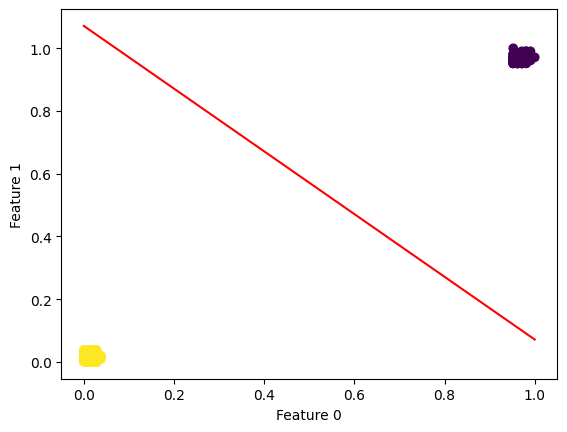

[[136   0]
 [  0 145]]


In [ ]:
per4 = Perceptron(n_iters=1000)

per4.fit(X_train4, y_train4)
perTrain4 = per4.predict(X_train4)

x0_1 = np.amin(X_train4[:, 0])
x0_2 = np.amax(X_train4[:, 0])
x1_1 = np.amin(X_train4[:, 1])
x1_2 = np.amax(X_train4[:, 1])

x = [x0_1, x0_2]
y = [x1_1, x1_2]

# Пересчет коэффициентов разделяющей прямой для двух признаков
slope = -per4.weights[0] / per4.weights[1]
intercept = -per4.bias / per4.weights[1]
# Вычисление точек для разделяющей прямой
x_line = np.array([x0_1, x0_2])
y_line = slope * x_line + intercept

# Построение двумерного рассеянного графика
plt.scatter(X_train4[:, 0], X_train4[:, 1], c=perTrain4, cmap='viridis')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
# Построение разделяющей прямой
plt.plot(x_line, y_line, color='red')
plt.show()
# Матрица различий
distinctions = confusion_matrix(y_train4, perTrain4)
print(distinctions)

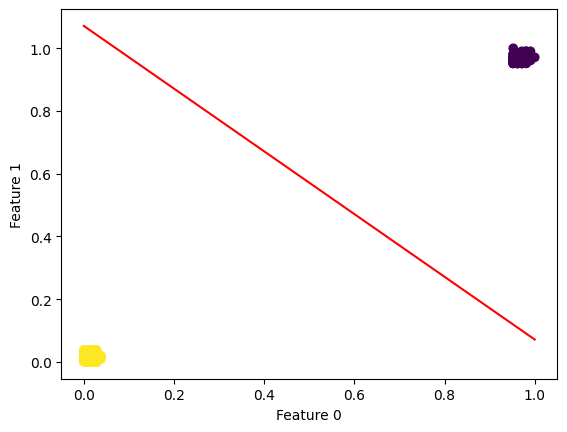

[[64 57]
 [ 0 55]]


In [ ]:
perTest4 = per4.predict(X_test4)

x0_1 = np.amin(X_train4[:, 0])
x0_2 = np.amax(X_train4[:, 0])
x1_1 = np.amin(X_train4[:, 1])
x1_2 = np.amax(X_train4[:, 1])

x = [x0_1, x0_2]
y = [x1_1, x1_2]

# Пересчет коэффициентов разделяющей прямой для двух признаков
slope = -per4.weights[0] / per4.weights[1]
intercept = -per4.bias / per4.weights[1]
# Вычисление точек для разделяющей прямой
x_line = np.array([x0_1, x0_2])
y_line = slope * x_line + intercept

# Построение двумерного рассеянного графика
plt.scatter(X_train4[:, 0], X_train4[:, 1], c=perTrain4, cmap='viridis')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
# Построение разделяющей прямой
plt.plot(x_line, y_line, color='red')
plt.show()
# Матрица различий
distinctions = confusion_matrix(y_test4, perTest4)
print(distinctions)

# Построение сети Кохонена

In [ ]:
 class KohonenNet():
    def __init__(self, m=5, n=1, lr=1, sigma=1, max_iter=5000, weights = []):
        self.m = m #количество классов
        self.n = n #количество уровней сети
        self.shape = (m, n)
        self.initial_lr = lr
        self.lr = lr #скорость обучения
        self.sigma = sigma #параметр изменения скорости обучения (она будет снижаться с каждой итерацией)
        self.max_iter = max_iter
        self.weights = weights
#функция нахождения выйгравшего нейрона (нейрона с минимальным расстоянием до точки)
    def _find_bmu(self, x):
        x_stack = np.stack([x]*(self.m*self.n), axis=0)#матрица размером [количество центров кластеров(нейронов), количество признаков] (для каждого веса своя строка признаков(точка))
        distance = np.linalg.norm(x_stack - self.weights, axis=1)#эвклидовы расстояния между точкой выборки и нейронами
        return np.argmin(distance)#возвращаем индекс минимального расстояния (индекс подходящего нейрона)

    def step(self, x):
        x_stack = np.stack([x]*(self.m*self.n), axis=0)#матрица размером [количество весов, количество признаков] (для каждого веса своя строка признаков(точка))
        bmu_index = self._find_bmu(x)#передаем в функцию строку признаков (точку) и получаем индекс выйгравшего нейрона (центра кластера)
        self.weights[bmu_index] += self.lr * (x - self.weights[bmu_index])

    #обучение весов
    def fit(self, X, epochs=1, shuffle=True):
        global_iter_counter = 0
        n_samples = X.shape[0]#количество элементов выборки
        total_iterations = np.minimum(epochs * n_samples, self.max_iter)#количество обучения весов в эпохе
        for epoch in range(epochs):#изначально у нас 1 эпоха
            if global_iter_counter > self.max_iter:#не даем проводить больше 3000 эпох
                break
            if shuffle:
                indices = np.random.permutation(n_samples)#создание массива с индексами в разброс
            else:
                indices = np.arange(n_samples)#создание массива с индексами по порядку
            #обучение
            for idx in indices:#проход по выборке с индексами idx
                if global_iter_counter > self.max_iter:
                    break
                input = X[idx]
                #перемещение нейрона(изменение весов победившего нейрона)
                self.step(input)
                global_iter_counter += 1
                self.lr = (1 - (global_iter_counter / total_iterations)) * self.initial_lr#изменение параметра обучения
        self._n_iter_ = global_iter_counter
        return

    def returnChangedWeights(self):
      return self.weights

    def predict(self, X):
        labels = np.array([self._find_bmu(x) for x in X])
        return labels


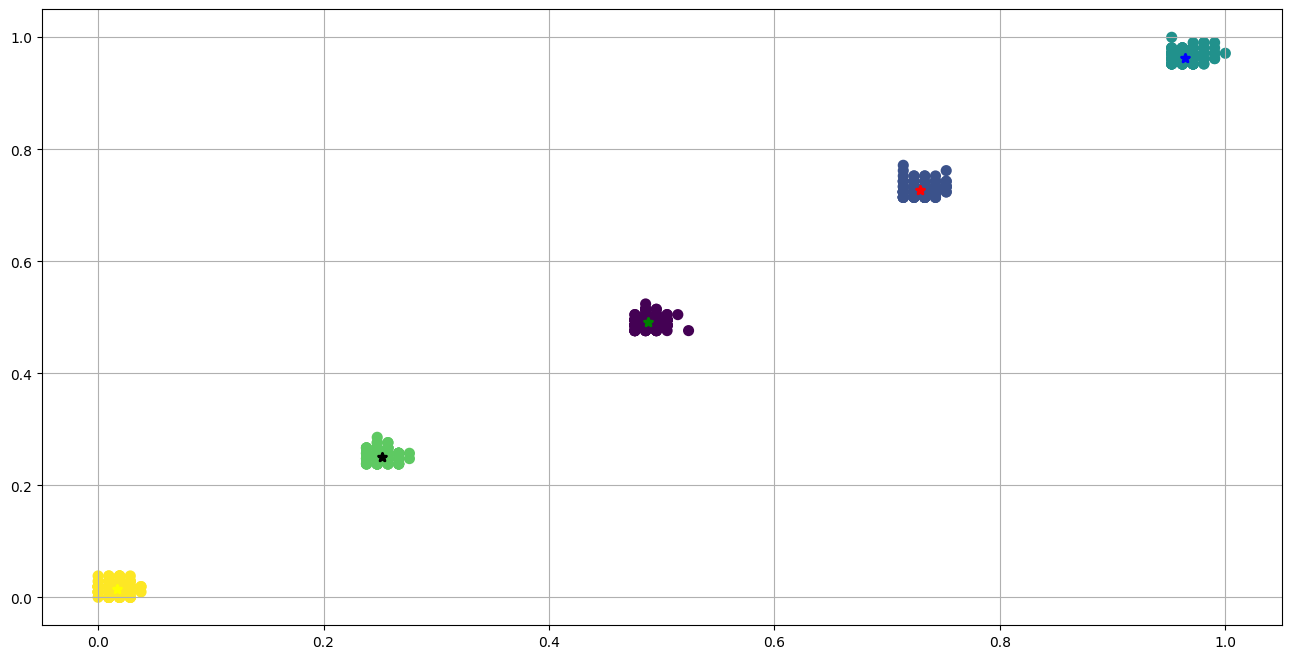

In [ ]:
trainMax = np.amax(X_train)
trainMin = np.amin(X_train)
weights = np.array([[0.27927872, 0.68345907],
                   [0.46390769, 0.45262438],
                   [0.73095387, 0.50869723],
                   [0.18705049, 0.00384747],
                   [0.08833449, 0.07329906]])
# weights = np.random.uniform(trainMin, trainMax, (5, 2))
# print(weights)

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot()
kohonen = KohonenNet(m=5, n=1, weights=weights)

kohonen.fit(X_train, shuffle=True)
predTrain = kohonen.predict(X_train)
ax.scatter(X_train[:,0], X_train[:,1], marker='o', linewidths=2, c=predTrain)
ax.grid()
ax.scatter(kohonen.returnChangedWeights()[0,0], kohonen.returnChangedWeights()[0,1],  marker='*', linewidths=2, c = "GREEN")
ax.scatter(kohonen.returnChangedWeights()[1,0], kohonen.returnChangedWeights()[1,1],  marker='*', linewidths=2, c = "RED")
ax.scatter(kohonen.returnChangedWeights()[2,0], kohonen.returnChangedWeights()[2,1],  marker='*', linewidths=2, c = "BLUE")
ax.scatter(kohonen.returnChangedWeights()[3,0], kohonen.returnChangedWeights()[3,1],  marker='*', linewidths=2, c = "BLACK")
ax.scatter(kohonen.returnChangedWeights()[4,0], kohonen.returnChangedWeights()[4,1],  marker='*', linewidths=2, c = "YELLOW")
# print(predTrain)

In [ ]:
# Добавление кода для изменения формы массива predTrain
predTrain = predTrain.reshape((len(predTrain), 1))
print(confusion_matrix(y_train, predTrain))

[[  0 147   0   0   0]
 [  0   0   0 129   0]
 [143   0   0   0   0]
 [  0   0   0   0 145]
 [  0   0 136   0   0]]


[[0.79300535 0.42506954]
 [0.67767179 0.02812127]
 [0.08825494 0.23338087]
 [0.66990269 0.26174502]
 [0.02201352 0.05321675]]
[3 0 0 0 3 0 0 3 0 4 0 4 0 0 0 0 2 0 0 2 3 4 2 3 2 2 4 0 0 0 2 4 0 3 2 4 0
 3 0 4 2 4 2 0 2 2 0 0 3 0 3 0 2 3 4 4 0 4 2 0 2 4 3 2 0 0 0 0 4 3 4 3 3 0
 2 2 0 4 3 2 0 4 2 4 2 3 0 0 0 2 2 3 3 2 0 3 0 4 4 0 0 2 0 2 0 0 3 0 4 0 3
 0 0 0 4 3 4 0 3 2 0 3 0 2 2 3 3 3 0 0 3 0 2 0 3 4 4 2 4 4 4 2 0 2 0 0 0 2
 0 2 0 4 0 3 0 3 2 0 4 0 3 0 0 0 0 0 2 0 2 2 2 3 4 0 3 2 2 2 0 0 3 0 2 3 0
 4 2 2 0 0 0 0 0 4 2 3 2 2 0 4 4 3 0 3 0 3 4 0 3 0 4 4 0 0 0 2 0 2 0 0 2 0
 0 4 0 4 3 2 0 3 2 0 3 3 4 4 2 0 4 2 4 2 3 0 2 4 3 4 4 2 4 0 0 0 2 2 3 0 0
 4 0 3 4 2 2 0 0 2 0 2 3 4 0 2 3 4 4 0 4 0 3 0 2 2 2 0 2 3 2 0 0 0 3 3 2 3
 0 3 4 4]


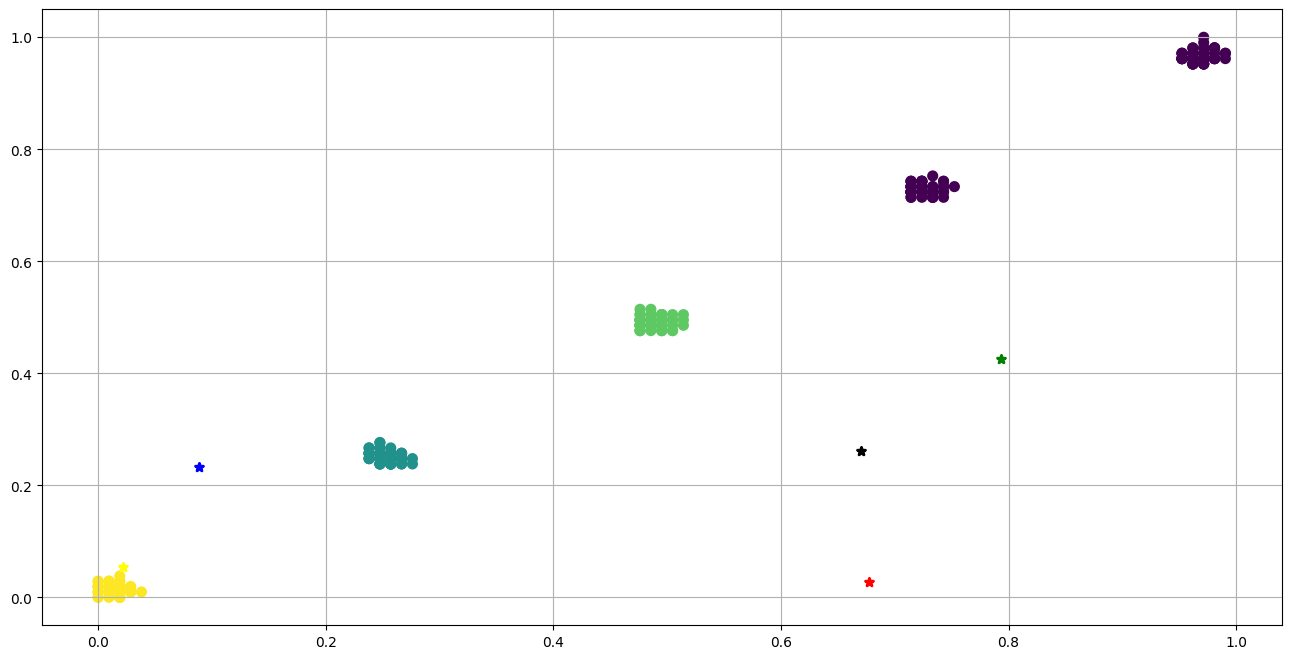

In [ ]:
testMax = np.amax(X_test)
testMin = np.amin(X_test)
weightsTest = np.random.uniform(testMin, testMax, (5, 2))
print(weightsTest)
kohonen = KohonenNet(m=5, n=1,lr=0.1, sigma=1, max_iter=10000, weights=weightsTest)
predTest = kohonen.predict(X_test)
print(predTest)
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot()

ax.scatter(X_test[:,0], X_test[:,1], marker='o', linewidths=2, c=predTest)
ax.grid()
ax.scatter(kohonen.returnChangedWeights()[0,0], kohonen.returnChangedWeights()[0,1],  marker='*', linewidths=2, c = "GREEN")
ax.scatter(kohonen.returnChangedWeights()[1,0], kohonen.returnChangedWeights()[1,1],  marker='*', linewidths=2, c = "RED")
ax.scatter(kohonen.returnChangedWeights()[2,0], kohonen.returnChangedWeights()[2,1],  marker='*', linewidths=2, c = "BLUE")
ax.scatter(kohonen.returnChangedWeights()[3,0], kohonen.returnChangedWeights()[3,1],  marker='*', linewidths=2, c = "BLACK")
ax.scatter(kohonen.returnChangedWeights()[4,0], kohonen.returnChangedWeights()[4,1],  marker='*', linewidths=2, c = "YELLOW")

In [ ]:
predTest = predTest.reshape((len(predTest),1))
print(confusion_matrix(y_test, predTest))

[[ 0  0  0 53  0]
 [71  0  0  0  0]
 [54  0  0  0  3]
 [50  5  0  0  0]
 [ 0  0  0 64  0]]


#Вероятностная нейронная сеть (PNN)

In [ ]:
# Вероятностная нейронная сеть с 4 слоями
class PNN(object):
    def __init__(self):
        self.L2 = []    # Слой 2, который хранит образцы
        print('Создана пустая PNN (Вероятностная нейронная сеть).')

    def train(self, X, y, p=2):
        self.n_ = X.shape[1]  # количество признаков
        self.p_ = p           # количество классов

        # Слой 2 (Образцы): Создаем пустые списки для каждого класса
        for k in range(self.p_):
            self.L2.append([])    # Используем базовые списки Python, потому что ndarray не может добавлять пустые массивы
                                  # Также, возможно, нам потребуется вводить разные типы данных

        # Вводим образцы в Слой 2
        for i in range(X.shape[0]):
            self.L2[y[i]].append(X[i])

        self.L2 = np.array(self.L2)    # Изменяем в ndarray для увеличения скорости (быстрее ли это?)

        print('PNN с %d классами обучена.' % self.p_)

    def crossValidate(self, X, y, sigma=0.5):
        result = self.predict(X, sigma)
        num_correct = sum(result[:, 0] == y)

        print('Точность перекрестной проверки с sigma %.2f: %.1f%%' % (sigma, num_correct/len(y) * 100))

    def predict(self, X, sigma=0.5):
        m = X.shape[0]
        accL3 = np.zeros((m, self.p_))
        accL4 = np.zeros(m)

        self.sigma_ = sigma    # параметр сглаживания, не стандартное отклонение
        self.C1_ = 2 * self.sigma_**2
        C2_ = (math.sqrt(2*math.pi) * self.sigma_) ** (- self.n_)

        # Слой 1 (Вход): x
        for i in range(m):
            x = X[i]

            # Слой 3 (Усреднение): для каждого класса
            self.L3_ = np.zeros(self.p_)
            for k in range(self.p_):
                for ki in range(len(self.L2[k])):
                    self.L3_[k] += self._activation(x, self.L2[k][ki])
                self.L3_[k] /= len(self.L2[k])

                # Умножаем на константу
                self.L3_[k] *= C2_
                accL3[i][k] = self.L3_[k]

            # Слой 4 (Выход/Решение): выбор класса с максимальной активацией
            self.L4_ = self.L3_.argmax()
            accL4[i] = self.L4_

        return np.column_stack((accL4, accL3))

    def _activation(self, x, w):
        diff = x - w
        return math.exp( - np.dot(diff, diff) / self.C1_ )

# Нормализация к единичной длине: [0, 1]
# X должен быть ndarray
def Normalize(X):
    x_max = X.max(axis=0)
    x_min = X.min(axis=0)
    return (X - x_min) / (x_max - x_min)


In [ ]:
pnn = PNN()

Создана пустая PNN (Вероятностная нейронная сеть).


In [ ]:
pnn.train(X_train, y_train, p=5)

PNN с 5 классами обучена.


<ipython-input-27-bc33212bd209>:20: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



In [ ]:
begin = 0.01
end   = 0.20
step  = 0.01
X_cv = X_train
y_cv = y_train
s = begin
while s < end+step:
    pnn.crossValidate(X_cv, y_cv, sigma=s)
    s += step

Точность перекрестной проверки с sigma 0.01: 100.0%
Точность перекрестной проверки с sigma 0.02: 100.0%
Точность перекрестной проверки с sigma 0.03: 100.0%
Точность перекрестной проверки с sigma 0.04: 100.0%
Точность перекрестной проверки с sigma 0.05: 100.0%
Точность перекрестной проверки с sigma 0.06: 100.0%
Точность перекрестной проверки с sigma 0.07: 100.0%
Точность перекрестной проверки с sigma 0.08: 100.0%
Точность перекрестной проверки с sigma 0.09: 100.0%
Точность перекрестной проверки с sigma 0.10: 100.0%
Точность перекрестной проверки с sigma 0.11: 100.0%
Точность перекрестной проверки с sigma 0.12: 100.0%
Точность перекрестной проверки с sigma 0.13: 100.0%
Точность перекрестной проверки с sigma 0.14: 100.0%
Точность перекрестной проверки с sigma 0.15: 100.0%
Точность перекрестной проверки с sigma 0.16: 100.0%
Точность перекрестной проверки с sigma 0.17: 100.0%
Точность перекрестной проверки с sigma 0.18: 100.0%
Точность перекрестной проверки с sigma 0.19: 100.0%
Точность пер

In [ ]:
result = pnn.predict(X_test, sigma=0.04)
print(result)

[[2.00000000e+000 2.12988638e-013 1.77136838e-013 9.22242378e+001
  2.02563390e-057 6.23536071e-058]
 [0.00000000e+000 9.17515138e+001 4.17494072e-058 2.68432840e-013
  4.68927165e-132 2.26716697e-013]
 [0.00000000e+000 8.58686843e+001 6.84009115e-057 9.97210325e-013
  3.01813459e-130 5.47588636e-014]
 ...
 [2.00000000e+000 1.91405403e-013 1.55394676e-013 8.22705557e+001
  1.73853933e-057 5.58463412e-058]
 [3.00000000e+000 6.03354773e-135 4.68039639e-014 4.06812547e-059
  8.79625759e+001 2.10040900e-241]
 [3.00000000e+000 6.38653029e-135 4.91744143e-014 4.31427587e-059
  9.21077716e+001 2.22251694e-241]]


#Сеть с прямым распрост­ра­нением сигнала и обрат­ным распространением ошибки (MLP)

In [ ]:
# Функция для инициализации нейронной сети с заданными размерами входного слоя, скрытого слоя и выходного слоя
def initialize_network(n_inputs, n_hidden, n_outputs):
  network = list()  # Создаем список для хранения слоев нейронной сети
  # Инициализация весов для скрытого слоя
  hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
  network.append(hidden_layer)  # Добавляем скрытый слой в сеть
  # Инициализация весов для выходного слоя
  output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
  network.append(output_layer)  # Добавляем выходной слой в сеть
  return network  # Возвращаем инициализированную нейронную сеть

# Устанавливаем начальное значение для генератора случайных чисел (для воспроизводимости)
seed(1)

# Инициализация нейронной сети с 2 входами, 4 нейронами в скрытом слое и 5 нейронами в выходном слое
network = initialize_network(2, 4, 5)

# Выводим инициализированные веса нейронной сети
for layer in network:
  print(layer)

[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}, {'weights': [0.2550690257394217, 0.49543508709194095, 0.4494910647887381]}, {'weights': [0.651592972722763, 0.7887233511355132, 0.0938595867742349]}, {'weights': [0.02834747652200631, 0.8357651039198697, 0.43276706790505337]}]
[{'weights': [0.762280082457942, 0.0021060533511106927, 0.4453871940548014, 0.7215400323407826, 0.22876222127045265]}, {'weights': [0.9452706955539223, 0.9014274576114836, 0.030589983033553536, 0.0254458609934608, 0.5414124727934966]}, {'weights': [0.9391491627785106, 0.38120423768821243, 0.21659939713061338, 0.4221165755827173, 0.029040787574867943]}, {'weights': [0.22169166627303505, 0.43788759365057206, 0.49581224138185065, 0.23308445025757263, 0.2308665415409843]}, {'weights': [0.2187810373376886, 0.4596034657377336, 0.28978161459048557, 0.021489705265908876, 0.8375779756625729]}]


In [ ]:
# Функция для вычисления активации нейрона
def activate(weights, inputs):
  activation = weights[-1]  # Инициализация активации смещением (bias) нейрона
  for i in range(len(weights)-1):
    activation += weights[i] * inputs[i]  # Суммирование взвешенных входов
  return activation  # Возвращение вычисленной активации

# Функция для применения функции активации (сигмоид) к активации нейрона
def transfer(activation):
  return 1.0 / (1.0 + exp(-activation))  # Функция сигмоида для преобразования активации в выход нейрона

# Функция для прямого распространения входа через нейронную сеть
def forward_propagate(network, row):
  inputs = row  # Входные данные для первого слоя - равны входной строке
  for layer in network:
    new_inputs = []  # Создаем список для хранения выходов нейронов текущего слоя
    for neuron in layer:
      activation = activate(neuron['weights'], inputs)  # Вычисляем активацию нейрона
      neuron['output'] = transfer(activation)  # Применяем функцию активации и сохраняем выход нейрона
      new_inputs.append(neuron['output'])  # Добавляем выход нейрона в список новых входов
    inputs = new_inputs  # Заменяем входы следующего слоя на выходы текущего слоя
  return inputs  # Возвращаем выходы последнего слоя, которые являются итоговым выводом сети

# Входные данные для прямого распространения через нейронную сеть
row = [1, 0, None]

# Прямое распространение входных данных через нейронную сеть
output = forward_propagate(network, row)

# Вывод результатов прямого распространения
print(output)

# Вывод инициализированных весов нейронной сети для каждого слоя
for layer in network:
  print(layer)


[0.8200053021353443, 0.864440888678203, 0.7953107835684001, 0.761446431939596, 0.8191067851200312]
[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614], 'output': 0.7105668883115941}, {'weights': [0.2550690257394217, 0.49543508709194095, 0.4494910647887381], 'output': 0.6691980263750579}, {'weights': [0.651592972722763, 0.7887233511355132, 0.0938595867742349], 'output': 0.678187028346445}, {'weights': [0.02834747652200631, 0.8357651039198697, 0.43276706790505337], 'output': 0.6132785437303728}]
[{'weights': [0.762280082457942, 0.0021060533511106927, 0.4453871940548014, 0.7215400323407826, 0.22876222127045265], 'output': 0.8200053021353443}, {'weights': [0.9452706955539223, 0.9014274576114836, 0.030589983033553536, 0.0254458609934608, 0.5414124727934966], 'output': 0.864440888678203}, {'weights': [0.9391491627785106, 0.38120423768821243, 0.21659939713061338, 0.4221165755827173, 0.029040787574867943], 'output': 0.7953107835684001}, {'weights': [0.22169166627303505, 0

In [ ]:
# Функция для вычисления производной функции активации (сигмоид)
def transfer_derivative(output):
  return output * (1.0 - output)  # Производная сигмоида

# Функция для обратного распространения ошибки через нейронную сеть
def backward_propagate_error(network, expected):
  for i in reversed(range(len(network))):
    layer = network[i]
    errors = list()  # Создаем список для хранения ошибок нейронов текущего слоя
    if i != len(network) - 1:
      for j in range(len(layer)):
        error = 0.0
        for neuron in network[i + 1]:
          error += (neuron['weights'][j] * neuron['delta'])  # Суммируем ошибки следующего слоя, взвешенные по соответствующим весам
        errors.append(error)
    else:
      for j in range(len(layer)):
        neuron = layer[j]
        errors.append(expected[j] - neuron['output'])  # Рассчитываем ошибку для выходного слоя
    for j in range(len(layer)):
      neuron = layer[j]
      neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])  # Вычисляем дельту (ошибку) для нейрона

# Ожидаемые значения для обучения
expected = [0, 1, 2, 3, 4]

# Вызываем функцию обратного распространения ошибки
backward_propagate_error(network, expected)

# Выводим обновленные значения для весов нейронной сети
for layer in network:
  print(layer)

# Функция для обновления весов нейронной сети на основе вычисленных ошибок
def update_weights(network, row, l_rate):
  for i in range(len(network)):
    inputs = row[:-1]  # Входные данные для текущего слоя
    if i != 0:
      inputs = [neuron['output'] for neuron in network[i - 1]]  # Если не первый слой, берем выходы предыдущего слоя
    for neuron in network[i]:
      for j in range(len(inputs)):
        # Обновление весов нейрона с учетом ошибки и скорости обучения
        neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
      neuron['weights'][-1] += l_rate * neuron['delta']  # Обновление веса смещения (bias) нейрона


[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614], 'output': 0.7105668883115941, 'delta': 0.06173891967256577}, {'weights': [0.2550690257394217, 0.49543508709194095, 0.4494910647887381], 'output': 0.6691980263750579, 'delta': 0.1070328165568492}, {'weights': [0.651592972722763, 0.7887233511355132, 0.0938595867742349], 'output': 0.678187028346445, 'delta': 0.07142132110435212}, {'weights': [0.02834747652200631, 0.8357651039198697, 0.43276706790505337], 'output': 0.6132785437303728, 'delta': 0.02389822453141952}]
[{'weights': [0.762280082457942, 0.0021060533511106927, 0.4453871940548014, 0.7215400323407826, 0.22876222127045265], 'output': 0.8200053021353443, 'delta': -0.12102999999350354}, {'weights': [0.9452706955539223, 0.9014274576114836, 0.030589983033553536, 0.0254458609934608, 0.5414124727934966], 'output': 0.864440888678203, 'delta': 0.015885201470839425}, {'weights': [0.9391491627785106, 0.38120423768821243, 0.21659939713061338, 0.4221165755827173, 0.02904

In [ ]:
# Функция для вычисления активации нейрона на основе весов и входных данных
def activate(weights, inputs):
  activation = weights[-1]  # Начинаем с веса смещения (bias)
  for i in range(len(weights) - 1):
    activation += weights[i] * inputs[i]  # Добавляем взвешенные входы
  return activation

# Функция для применения функции активации (сигмоид)
def transfer(activation):
  return 1.0 / (1.0 + exp(-activation))  # Сигмоидальная функция активации

# Прямое распространение входных данных через сеть до получения выхода
def forward_propagate(network, row):
  inputs = row
  for layer in network:
    new_inputs = []
    for neuron in layer:
      activation = activate(neuron['weights'], inputs)
      neuron['output'] = transfer(activation)
      new_inputs.append(neuron['output'])
    inputs = new_inputs
  return inputs

# Функция прогноза на основе выходов сети
def predict(network, row):
  outputs = forward_propagate(network, row)
  return outputs.index(max(outputs))  # Возвращает индекс нейрона с максимальным выходом

# Функция для обучения нейронной сети
def train_network(network, train, l_rate, n_epoch, n_outputs):
  for epoch in range(n_epoch):
    sum_error = 0
    for row in train:
      outputs = forward_propagate(network, row)
      expected = [0 for i in range(n_outputs)]
      expected[row[-1]] = 1  # Устанавливаем ожидаемый выход для соответствующего класса
      sum_error += sum([(expected[i] - outputs[i])**2 for i in range(len(expected))])  # Рассчитываем сумму квадратов ошибок
      backward_propagate_error(network, expected)  # Функция обратного распространения ошибки
      update_weights(network, row, l_rate)  # Функция обновления весов
      # print('>epoch={}, lrate={:.3f}, error={:.3f}'.format(epoch, l_rate, sum_error)) закомментил так как слишком много информации


In [ ]:
# Преобразуем X_train в список
blist = X_train.tolist()
# Вычитаем 1 из y_train и также преобразуем его в список
Y_train = y_train
Y_train = Y_train.tolist()
# Добавляем Y_train в список blist
for i in range(0, len(y_train)):
    blist[i] = blist[i] + [Y_train[i]]  # Добавление целого числа в список
# Выводим список blist
print(blist)
# Присваиваем dataset значение списка blist
dataset = blist
# Вычисляем количество входных параметров (на основе длины первой строки) и количество выходных классов
n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))
# Инициализируем нейронную сеть
network = initialize_network(n_inputs, 2, n_outputs)
# Обучаем нейронную сеть
train_network(network, dataset, 0.5, 200, n_outputs)

[[0.4761904761904764, 0.5047619047619049, 2], [0.5047619047619049, 0.4857142857142859, 2], [0.5047619047619049, 0.49523809523809537, 2], [0.49523809523809537, 0.5047619047619049, 2], [0.7333333333333335, 0.7333333333333335, 0], [0.9714285714285716, 0.9523809523809524, 4], [0.23809523809523814, 0.25714285714285723, 1], [0.4857142857142859, 0.49523809523809537, 2], [0.9619047619047622, 0.9619047619047622, 4], [0.49523809523809537, 0.4857142857142859, 2], [0.4761904761904764, 0.49523809523809537, 2], [0.4761904761904764, 0.4857142857142859, 2], [0.49523809523809537, 0.4857142857142859, 2], [0.7142857142857143, 0.723809523809524, 0], [0.4857142857142859, 0.49523809523809537, 2], [0.4857142857142859, 0.4857142857142859, 2], [0.25714285714285723, 0.24761904761904774, 1], [0.24761904761904774, 0.25714285714285723, 1], [0.723809523809524, 0.7142857142857143, 0], [0.24761904761904774, 0.25714285714285723, 1], [0.009523809523809601, 0.01904761904761909, 3], [0.02857142857142858, 0.0, 3], [0.2571

[[147   0   0   0   0]
 [  0 129   0   0   0]
 [  0   0 143   0   0]
 [  0   0   0 145   0]
 [  0   0   0   0 136]]


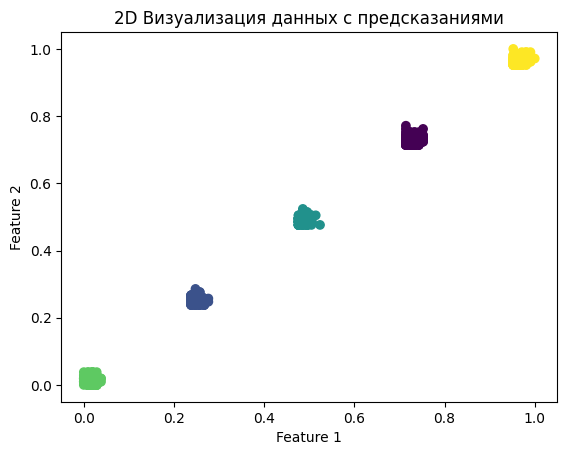

In [ ]:
# Создаем пустой массив для предсказаний на обучающем наборе данных
predictTrain = []

# Проходим по данным в наборе dataset
for row in dataset:
    prediction = predict(network, row)  # Делаем прогноз для текущей строки
    predictTrain.append(prediction)
# Выводим матрицу ошибок (confusion matrix) между Y_train и predictTrain
print(confusion_matrix(Y_train , predictTrain))
# Создаем 2D график для визуализации данных
plt.scatter(X_train[:, 0], X_train[:, 1], c=predictTrain, marker='o', linewidths=1)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Визуализация данных с предсказаниями')
plt.show()


[[53  0  0  0  0]
 [ 0 71  0  0  0]
 [ 0  0 57  0  0]
 [ 0  0  0 55  0]
 [ 0  0  0  0 64]]


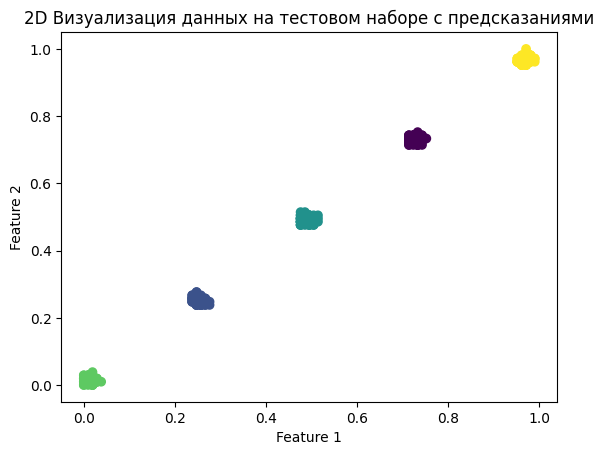

In [ ]:
# Создаем пустой массив для предсказаний на тестовом наборе данных
predictTest = []

# Проходим по данным в наборе X_test
for row in X_test:
    prediction = predict(network, row)  # Делаем прогноз для текущей строки
    predictTest.append(prediction)
# Выводим матрицу ошибок (confusion matrix) между y_test и predictTest
confusion_test = confusion_matrix(y_test, predictTest)
print(confusion_test)
# Создаем 2D график для визуализации данных на тестовом наборе
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictTest, marker='o', linewidths=1)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Визуализация данных на тестовом наборе с предсказаниями')
plt.show()